## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

### Question 1 - Correlations (15 points)

Provide example datapoints matching the following descriptions. Each example should be constructed over n=50 datapoints. Provide a table description of the example data as well as a jointplot (see example below). 
If you think that the situation described is impossible then clearly explain why (you don’t need to give a rigorous proof).<br>
Pearson(x,y) = Pearson correlation<br>
τ(x,y) = Kendall rank correlation<br>
ρ(x,y) = Spearman rank correlation <br>
<img src="jointplot.png">

In [2]:
import warnings
import math
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from scipy.stats import norm
from scipy.stats import lognorm
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import kendalltau
from scipy.stats import multivariate_normal as mvnorm

warnings.filterwarnings('ignore')

#### 1.A
Data in which  $Pearson(x,y) < -0.9$ but where $n-1$ points can be selected so that for the vectors restricted to those we have $Pearson(x_{n-1},y_{n-1}) > -0.2$

Pearson(x,y) -> -0.95
pearson(x_n-1, y_n-1) -> 0.13
Is Pearson(x,y) < (-0.9) ? -> True
Is Pearson(x_n-1,y_n-1) > (-0.2) ? -> True


,x,y
count,50.000000,50.000000
mean,1.438246,-1.557072
std,4.204974,4.223439
min,-0.906825,-30.000000
25%,0.392199,-1.697085
50%,0.949674,-1.076080
75%,1.443855,-0.325481
max,30.000000,1.411108


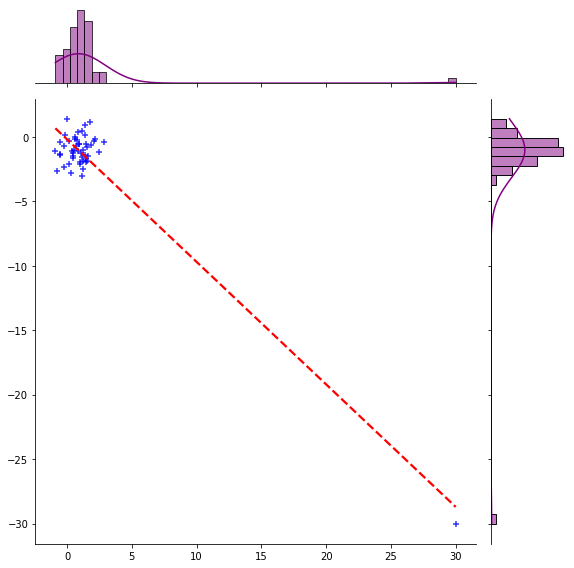

In [2]:
pears = -0.3

while pears < -0.2:
    mu = [1, -1]
    sigma = [[0.8, -0.05],[-0.05, 0.8]]
    X = mvnorm(mu, sigma)
    r = X.rvs(size=49)
    r[:,0][-2] = 1.2
    r[:,1][-2] = -1
    x = r[:,0]
    y = r[:,1]
    pears = pearsonr(x,y)[0]

x = np.append(x, 30)
y = np.append(y, -30)
print(f"Pearson(x,y) -> {pearsonr(x,y)[0]:.2f}")
print(f"pearson(x_n-1, y_n-1) -> {pearsonr(x[:-1], y[:-1])[0]:.2f}")
print(f"Is Pearson(x,y) < (-0.9) ? -> {pearsonr(x,y)[0] < -.9}")
print(f"Is Pearson(x_n-1,y_n-1) > (-0.2) ? -> {pearsonr(x[:-1], y[:-1])[0] > -0.2}")
sns.jointplot(x, y, marker='+', height=8, kind='reg',
              joint_kws={'color':'blue', 'ci':None, 'line_kws':{'color':'red', 'linestyle':'--'}},
              marginal_kws={'color':'purple'})

pd.DataFrame(list(zip(x,y)), columns=['x','y']).describe()

#### 1.B
Data with τ(x,y) > ρ(x,y) + 0.45

Spearman(x,y) -> -0.50
Kenadall's tau(x,y)-> -0.02
Is τ(x,y) > ρ(x,y) + 0.45 ? -> True


,x,y
count,50.00000,50.000000
mean,25.50000,50.250000
std,14.57738,38.356203
min,1.00000,1.000000
25%,13.25000,13.250000
50%,25.50000,50.000000
75%,37.75000,87.239583
max,50.00000,100.000000


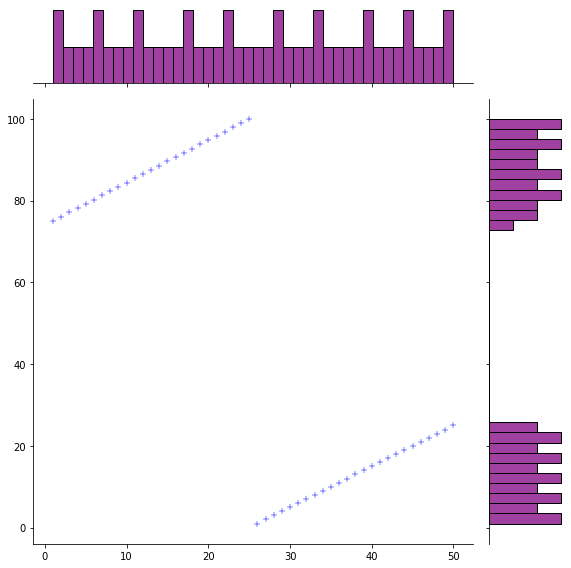

In [3]:
x = np.linspace(1, 50)
y = np.concatenate((np.linspace(75, 100, num=25), np.linspace(1, 25, num=25)))

print(f"Spearman(x,y) -> {spearmanr(x,y)[0]:.2f}")
print(f"Kenadall's tau(x,y)-> {kendalltau(x,y)[0]:.2f}")
print(f"Is τ(x,y) > ρ(x,y) + 0.45 ? -> {kendalltau(x,y)[0] > spearmanr(x,y)[0] + 0.45}")
sns.jointplot(x, y, marker='+', height=8, 
                      joint_kws={'color':'blue', 'ci':None},
                      marginal_kws={'color':'purple', 'bins': 40})

pd.DataFrame(list(zip(x,y)), columns=['x','y']).describe()

#### 1.C
Data with τ(x,y) < ρ(x,y) – 0.45

Spearman(x,y) -> 0.50
Kenadall's tau(x,y)-> 0.02
Is τ(x,y) < ρ(x,y) - 0.45 ? -> True


,x,y
count,50.00000,50.000000
mean,25.50000,50.250000
std,14.57738,38.356203
min,1.00000,1.000000
25%,13.25000,13.250000
50%,25.50000,50.000000
75%,37.75000,87.239583
max,50.00000,100.000000


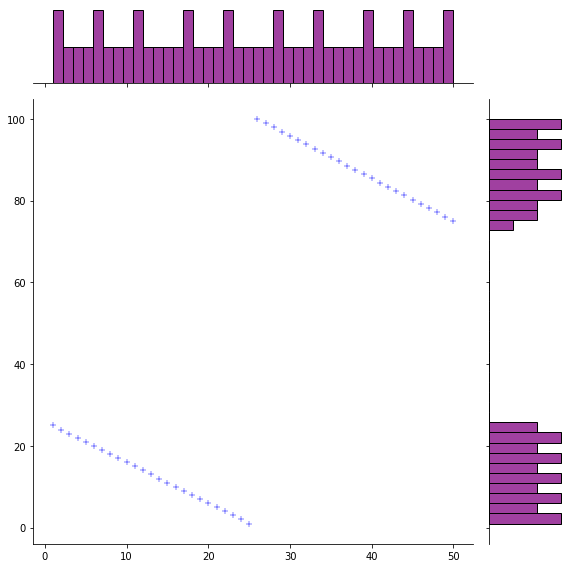

In [4]:
x = np.linspace(1, 50)
y = np.concatenate((np.flip((np.linspace(1,25,num=25))), np.flip(np.linspace(75,100, num=25))))

print(f"Spearman(x,y) -> {spearmanr(x,y)[0]:.2f}")
print(f"Kenadall's tau(x,y)-> {kendalltau(x,y)[0]:.2f}")
print(f"Is τ(x,y) < ρ(x,y) - 0.45 ? -> {kendalltau(x,y)[0] < spearmanr(x,y)[0] - 0.45}")
sns.jointplot(x, y, marker='+', height=8, 
                      joint_kws={'color':'blue', 'ci':None},
                      marginal_kws={'color':'purple', 'bins': 40})

pd.DataFrame(list(zip(x,y)), columns=['x','y']).describe()

#### 1.D
Data with Pearson(x,y) < ρ(x,y) – 0.6

pearson correlation -> 0.340
spearman correlation -> 1.000
Is pearson(x,y) < ρ(x,y) - 0.6 ? -> True


,x,y
count,50.00000,50.000000
mean,25.50000,44.500000
std,14.57738,138.609163
min,1.00000,1.000000
25%,13.25000,13.250000
50%,25.50000,25.500000
75%,37.75000,37.750000
max,50.00000,1000.000000


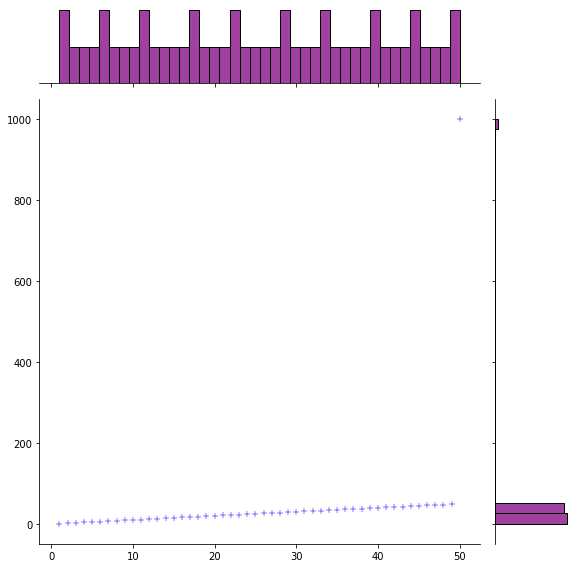

In [5]:
x = np.linspace(1,50)
y = np.append(x[:-1],1000)
print(f"pearson correlation -> {pearsonr(x,y)[0]:.3f}")
print(f"spearman correlation -> {spearmanr(x,y)[0]:.3f}")
print(f"Is pearson(x,y) < ρ(x,y) - 0.6 ? -> {pearsonr(x,y)[0] < spearmanr(x,y)[0] -0.6}")
sns.jointplot(x,y, marker='+', height=8, 
                      joint_kws={'color':'blue', 'ci':None},
                      marginal_kws={'color':'purple', 'bins': 40})
pd.DataFrame(list(zip(x,y)), columns=['x','y']).describe()

#### 1.E
Data with Pearson(x,y) > ρ(x,y) + 1.2

pearson correlation -> 0.923
spearman correlation -> -0.885
Is pearson(x,y) > ρ(x,y) + 1.2 ? -> True


,x,y
count,51.000000,51.000000
mean,7.352941,7.352941
std,13.495497,13.495497
min,1.000000,1.000000
25%,3.295918,3.295918
50%,5.591837,5.591837
75%,7.887755,7.887755
max,100.000000,100.000000


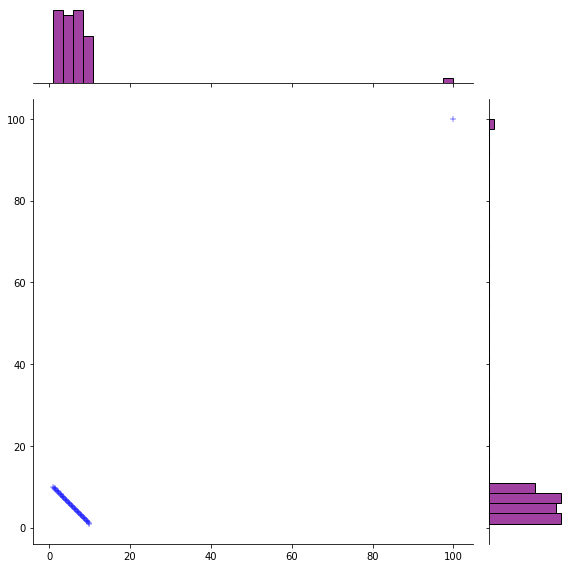

In [6]:
x = np.concatenate((np.linspace(1,10, 50),[100]))
y = np.concatenate((np.flip(np.linspace(1, 10, 50)),[100]))
print(f"pearson correlation -> {pearsonr(x,y)[0]:.3f}")
print(f"spearman correlation -> {spearmanr(x,y)[0]:.3f}")
print(f"Is pearson(x,y) > ρ(x,y) + 1.2 ? -> {pearsonr(x,y)[0] > spearmanr(x,y)[0] + 1.2}")
sns.jointplot(x, y,  marker='+', height=8, 
                      joint_kws={'color':'blue', 'ci':None},
                      marginal_kws={'color':'purple', 'bins': 40})
pd.DataFrame(list(zip(x,y)), columns=['x','y']).describe()

#### 1.F
Data with τ(x,y) < ρ(x,y) – 1.2 

This is impossible!

Intuition $\rightarrow$ both methods are used for non-paremetric rank correlations, although each method computes the correlation between two variables differently, the difference could not be as large as 1.

Attached is an $\stackrel{(i)}{\textrm{artical}}$ that proofs that the limit of the ratio $\frac{ρ}{τ}$ is $\frac{3}{2}$ $\Rightarrow$ ρ $\stackrel{(ii)}{=}$ 1.5τ $\forall \lim_{n \to \infty}$<br><br>
That means $ |ρ - τ| \stackrel{(ii)}{=} |1.5τ - τ| = |0.5τ| \stackrel{(iii)}{\leq} 0.5$ $\Rightarrow$ Thus, since the maximum gap (absolut value) between spearman's ρ and kendall's τ is 0.5, it is impossible to generate a gap of 1.2 <br><br>$(i)$ https://www.sciencedirect.com/science/article/abs/pii/S0378375806002588 <br><br> $(iii)$ -1 < τ < 1

### Question 2 - Analysis of the UCI Heart Disease dataset  (40 points)

Perform data analysis on the UCI Heart Disease Dataset
References:
1. Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. American Journal of Cardiology, 64,304--310.
2. David W. Aha & Dennis Kibler. "Instance-based prediction of heart-disease presence with the Cleveland database."
3. Gennari, J.H., Langley, P, & Fisher, D. (1989). Models of incremental concept formation. Artificial Intelligence, 40, 11--61.

Use the following links to find the details of the data: 
1. https://archive.ics.uci.edu/ml/datasets/heart+disease
2. https://www.kaggle.com/ronitf/heart-disease-uci

In the follwong cells write a report for your analysis. In your report provide a clear description of the analysis methods and of the results. This should include a graphical representation of the results and the conclusions. Provide p-values or other indicators of the statistical significance where appropriate. <br>
Design your report to be concise but still cover interesting findings.

There are missing values in the data. Find them and impute them by using the median (for numerical features) or the mode (for categorical features) value of the relevant feature (column).
Address the following questions:
* Using confidence intervals determine for which numerical features you can state with confidence of 95% that the healthy population (target = 0) mean is larger/smaller than the disease population (target = 1) mean. 
* Draw histograms for each numerical feature. Inspect the observed distributions and then use MLE to plot, on the same figures, fits of the distributions.
* For each pair of numerical feature, calculate correlations and indicate whether you find them significant. For select pairs, with significant correlations, draw joint plot with marginal histograms (see Seaborn joint plot) and find bivariate normal fits. Then use the example code below to draw plots of the bivariate pdfs (you may edit the code as you see fit).
* Are there pairs that are significantly correlated in males but not in females? The opposite? How about healthy vs disease? Can you graphically represent this?
* For each numerical feature, except age, plot the distribution for this feature against bins of age. In each bin provide a split violin plot, with different colors for healthy and disease.

Suggest, state and address at least one original question.


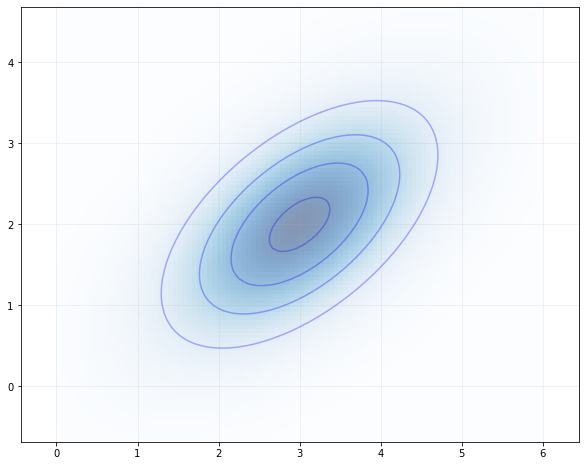

In [7]:
%matplotlib inline

def plot_2d_Gaussian_pdf(means, cov, features_list=None):
    n = 100
    x1 = np.linspace(means[0] - 3 * np.sqrt(cov[0][0]), means[0] + 3 * np.sqrt(cov[0][0]), n)
    x2 = np.linspace(means[1] - 3 * np.sqrt(cov[1][1]), means[1] + 3 * np.sqrt(cov[1][1]), n)
    x1_v, x2_v = np.meshgrid(x1, x2)
    Xgrid = np.vstack([x1_v.ravel(), x2_v.ravel()]).T
    Y = mvnorm.pdf(Xgrid, means, cov)
    fig, ax = plt.subplots()
    ax.pcolorfast(x1, x2, Y.reshape(x1_v.shape), alpha=0.5, cmap='Blues')
    ax.contour(x1_v, x2_v, Y.reshape(x1_v.shape),
               levels=[0.05, 0.1, 0.15, 0.2], alpha=0.3, colors='b')
    ax.axis('equal')
    ax.grid(alpha=0.2)
    fig.set_size_inches(10, 8)
    if features_list:
        ax.set_title(f"{features_list[0]} vs. {features_list[1]} bivariate pdf", fontsize=15)
        ax.set_xlabel(features_list[0])
        ax.set_ylabel(features_list[1])
    plt.show()
    
means = [3, 2]
cov = [[1, 0.5], [0.5, 0.8]]
plot_2d_Gaussian_pdf(means, cov)

In [41]:
df = pd.read_csv('heart.csv', index_col=False, sep='\t')

In [42]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0,2.3,0,0,1,1
1,37.0,1.0,NaN,130.0,250.0,0.0,1.0,187.0,0,3.5,0,0,2,1
2,41.0,0.0,1.0,NaN,NaN,0.0,0.0,172.0,0,1.4,2,0,2,1
3,NaN,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0,0.8,2,0,2,1
4,NaN,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1,0.6,2,0,2,1


In [43]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,295.000000,299.000000,298.000000,297.000000,297.000000,300.000000,301.000000,299.000000,303.000000,298.000000,303.000000,303.000000,303.000000,303.000000
mean,54.389831,0.682274,0.969799,131.663300,245.966330,0.150000,0.521595,149.565217,0.326733,1.040604,1.399340,0.729373,2.313531,0.544554
std,9.084668,0.466373,1.032678,17.532242,52.117969,0.357668,0.519967,23.008131,0.469794,1.167458,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


There are missing values in the data. Find them and impute them by using the median (for numerical features) or the mode (for categorical features) value of the relevant feature (column)

In [44]:
df.isna().sum()

age         8
sex         4
cp          5
trestbps    6
chol        6
fbs         3
restecg     2
thalach     4
exang       0
oldpeak     5
slope       0
ca          0
thal        0
target      0
dtype: int64

In [45]:
df.age.fillna(df['age'].median(), inplace=True)
df.sex.fillna(df['sex'].mode()[0], inplace=True)
df.cp.fillna(df['cp'].mode()[0], inplace=True)
df.trestbps.fillna(df['trestbps'].median(), inplace=True)
df.chol.fillna(df['chol'].median(), inplace=True)
df.fbs.fillna(df['fbs'].mode()[0], inplace=True)
df.restecg.fillna(df['restecg'].mode()[0], inplace=True)
df.thalach.fillna(df['thalach'].median(), inplace=True)
df.oldpeak.fillna(df['oldpeak'].median(), inplace=True)

numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

print(f"validate that there are no missing values in the dataframe --> {df.isna().sum().sum()==0}")

validate that there are no missing values in the dataframe --> True


In [46]:
print("******* Summary of the Categorial Variables *******\n")
print(f'* reminder - there are {len(df)} patients in the dataset\n')
print(f"1. There are {df.sex.value_counts()[0]} females and {df.sex.value_counts()[1]} males in the dataset")
print(f"\n2. chest pain patients:\n\t* {df.cp.value_counts()[0]} patients with typical angina\n\t* {df.cp.value_counts()[1]} patients with atypical angina\n\t* {df.cp.value_counts()[2]} patients with non-anginal pain\n\t* {df.cp.value_counts()[3]} patients asymptomatic")
print(f"\n3. {df.fbs.value_counts()[1]} patient with fasting blood sugear > 120 mg/dl")
print(f"\n4. resting electroardiographic results\n\t* {df.restecg.value_counts()[0]} normal\n\t* {df.restecg.value_counts()[1]} having ST-T wave abnormality\n\t* {df.restecg.value_counts()[2]} showing probable or definite left ventricular hypertrophy by Estes' criteria")
print(f"\n5. {df.exang.value_counts()[1]} patients exerice induced angina")
print(f"\n6. slope of peak exercise ST segment:\n\t* {df.slope.value_counts()[0]} unsloping\n\t* {df.slope.value_counts()[1]} flat\n\t* {df.slope.value_counts()[2]} downsloping")
print(f"\n7. number of major vessels colord by flourosopy:\n\t1 = {df.ca.value_counts()[1]}\n\t2 = {df.ca.value_counts()[2]}\n\t3 = {df.ca.value_counts()[3]}\n\t4 = {df.ca.value_counts()[4]}")
print(f"\n8. {(100*(df.target.value_counts()[1]/len(df))):.2f}% of the people in the dataset has heart disease")

******* Summary of the Categorial Variables *******

* reminder - there are 303 patients in the dataset

1. There are 95 females and 208 males in the dataset

2. chest pain patients:
	* 145 patients with typical angina
	* 50 patients with atypical angina
	* 85 patients with non-anginal pain
	* 23 patients asymptomatic

3. 45 patient with fasting blood sugear > 120 mg/dl

4. resting electroardiographic results
	* 147 normal
	* 153 having ST-T wave abnormality
	* 3 showing probable or definite left ventricular hypertrophy by Estes' criteria

5. 99 patients exerice induced angina

6. slope of peak exercise ST segment:
	* 21 unsloping
	* 140 flat
	* 142 downsloping

7. number of major vessels colord by flourosopy:
	1 = 65
	2 = 38
	3 = 20
	4 = 5

8. 54.46% of the people in the dataset has heart disease


Using confidence intervals determine for which numerical features you can state with confidence of 95% that the healthy population (target = 0) mean is larger/smaller than the disease population (target = 1) mean

In [14]:
def confidence_intervals(features: list):
       conf_dict = {}
       unconf_dict = {}

       for feature in features:

              x = df.groupby(['target'])[feature].agg(['mean', 'std', 'count'])

              means_diff = x['mean'][0] - x['mean'][1]
              pooled_std = math.sqrt(
                     ((x['count'][0] - 1) * (x['std'][0]**2)+
                     (x['count'][1] - 1) * (x['std'][1]**2)) /
                     (x['count'][0] + x['count'][1] - 2))

              higher = means_diff + 1.96*(pooled_std)*math.sqrt((1/x['count'][0])+(1/x['count'][1]))
              lower = means_diff - 1.96*(pooled_std)*math.sqrt((1/x['count'][0])+(1/x['count'][1]))

              
              if lower*higher > 0 :
                     conf_dict[feature] = lower, higher
              else:
                     unconf_dict[feature] = lower, higher

       print(f"\nnumerical features we can state with confidence of 95% are:\n\n{pd.DataFrame.from_dict(conf_dict, orient='index', columns=['lower_bound', 'higher_bound'])}")
       print(f"\n{'-'*60}")
       print(f"\nnumerical features we cannot state with confidence of 95% are:\n\n{pd.DataFrame.from_dict(unconf_dict, orient='index', columns=['lower_bound', 'higher_bound'])}")
confidence_intervals(numerical_features)


numerical features we can state with confidence of 95% are:

          lower_bound  higher_bound
age          2.176316      6.126714
trestbps     1.194284      8.972514
thalach    -24.044357    -14.659200
oldpeak      0.745007      1.220289

------------------------------------------------------------

numerical features we cannot state with confidence of 95% are:

      lower_bound  higher_bound
chol    -2.970322     20.321311


Draw histograms for each numerical feature. Inspect the observed distributions and then use MLE to plot, on the same figures, fits of the distributions

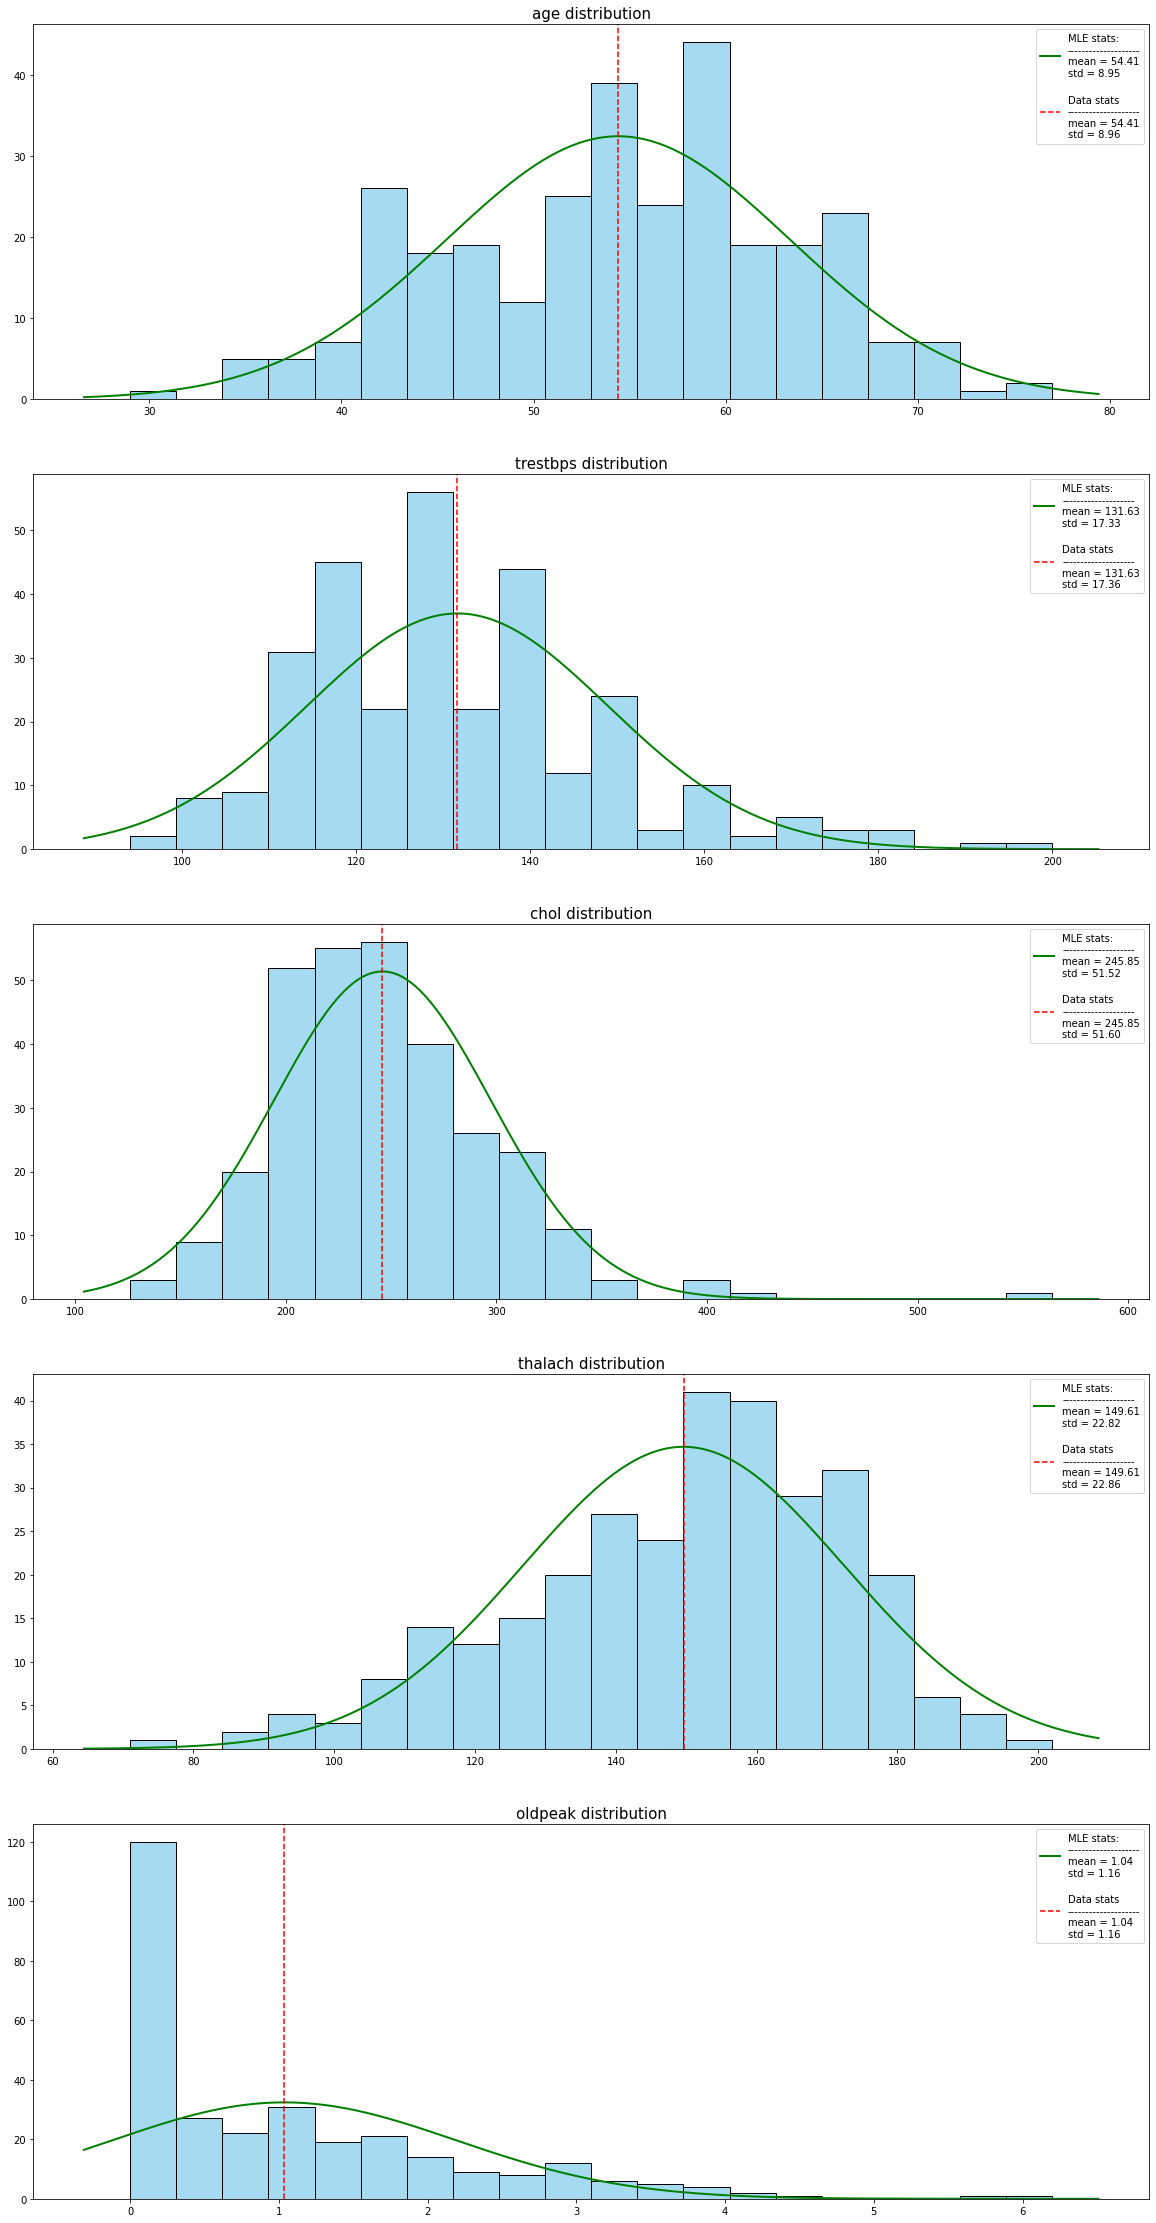

In [15]:
fig, axes = plt.subplots(len(numerical_features), 1, figsize=(20,40))


for idx, feature in enumerate(numerical_features):

    sns.histplot(df[feature], color='skyblue', ax=axes[idx], bins=20)
    
    mle_line = np.linspace(*axes[idx].get_xlim(), len(df))
    mle_mean, mle_std = norm.fit(df[feature])
    mle_dist = norm.pdf(mle_line, mle_mean, mle_std)

    axes[idx].plot(mle_line, mle_dist*len(df)*((df[feature].max()-df[feature].min())/20), 'g', linewidth=2, label=f"MLE stats:\n{'-'*20}\nmean = {mle_mean:.2f}\nstd = {mle_std:.2f}")
    axes[idx].axvline(x=df[feature].mean(), color='r', linestyle='--', label=f"\nData stats\n{'-'*20}\nmean = {df[feature].mean():.2f}\nstd = {df[feature].std():.2f}")
    axes[idx].set_title(f'{feature} distribution', fontsize=15)
    axes[idx].legend()
    axes[idx].set_ylabel('')
    axes[idx].set_xlabel('')

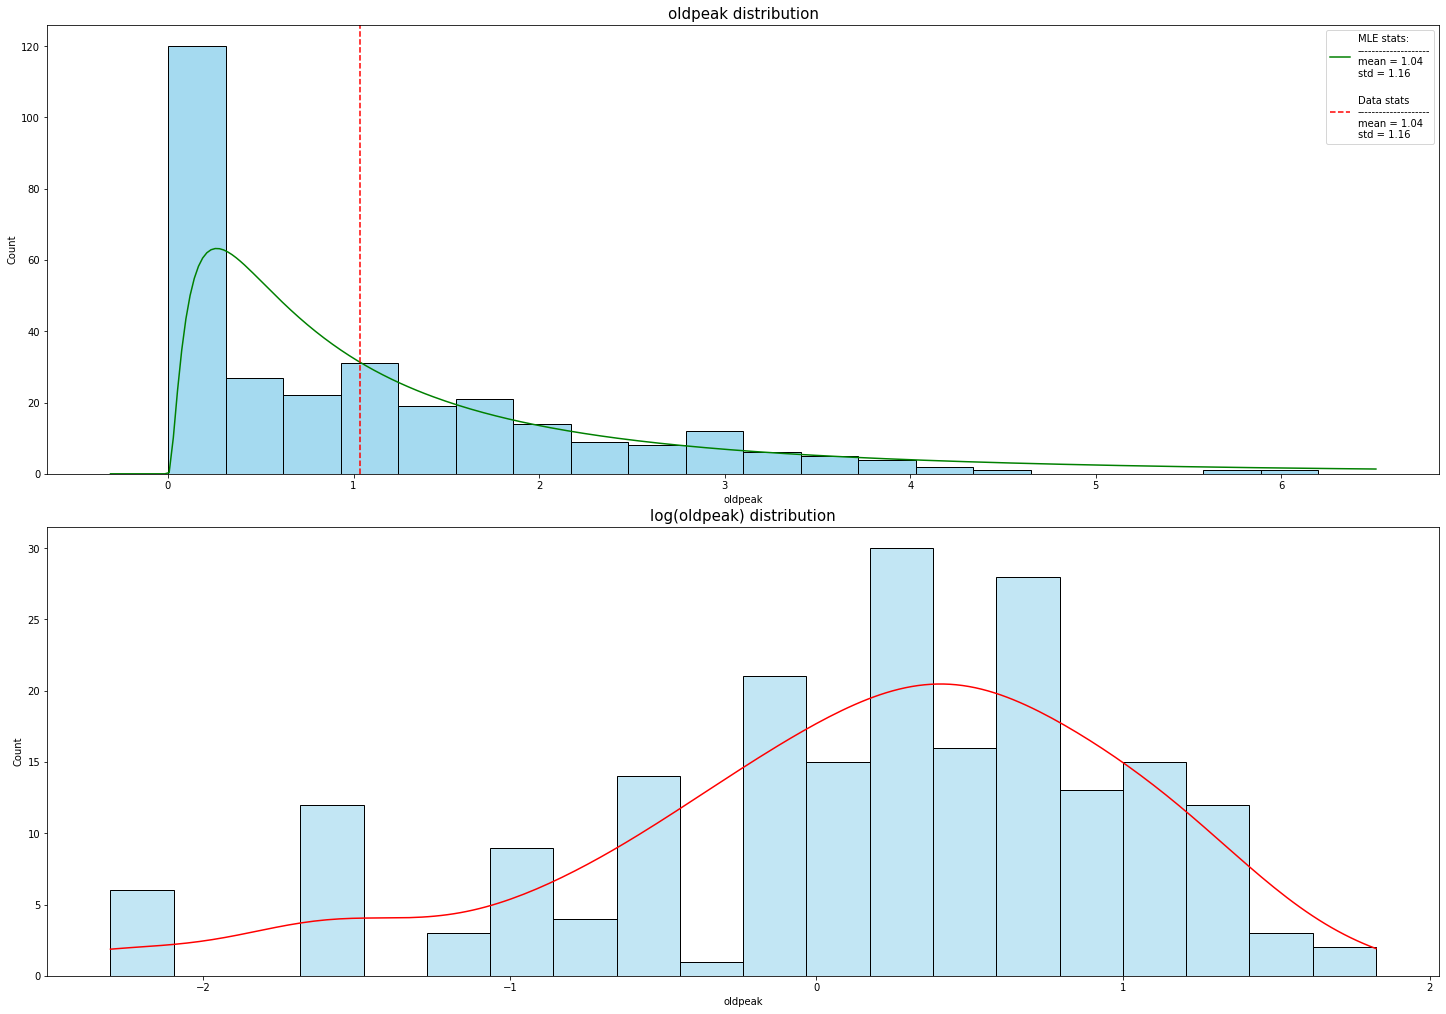

In [16]:
fig, axes = plt.subplots(2,1, figsize=(20,14))

sns.histplot(df['oldpeak'], color='skyblue', ax=axes[0], bins=20)
mle_line = np.linspace(*axes[0].get_xlim(), len(df))
mle_mean, mle_std = norm.fit(df['oldpeak'])
mle_dist = lognorm([mle_std]).pdf(mle_line)
axes[0].set_title(f'oldpeak distribution', fontsize=15)
axes[0].plot(mle_line, mle_dist*len(df)*((df['oldpeak'].max()-df['oldpeak'].min())/20), 'g', label=f"MLE stats:\n{'-'*20}\nmean = {mle_mean:.2f}\nstd = {mle_std:.2f}")
axes[0].axvline(x=df['oldpeak'].mean(), color='r', linestyle='--', label=f"\nData stats\n{'-'*20}\nmean = {df['oldpeak'].mean():.2f}\nstd = {df['oldpeak'].std():.2f}")
axes[0].legend()

sns.histplot(np.log(df['oldpeak']), color='skyblue', ax=axes[1], bins=20, kde=True,)
mle_line = np.linspace(*axes[1].get_xlim(), len(df))
axes[1].set_title(f'log(oldpeak) distribution', fontsize=15)
axes[1].lines[0].set_color('red')

fig.tight_layout(pad=0.4)

For each pair of numerical feature, calculate correlations and indicate whether you find them significant. Then use the example code below to draw plots of the bivariate pdfs (you may edit the code as you see fit).


correlation & p-value for numeric features:
(sorted by correlation's absolut value)
--------------------------------------------------
                     pearson_correlation  p_value
(age, thalach)                    -0.402  0.00000
(thalach, oldpeak)                -0.330  0.00000
(age, trestbps)                    0.257  0.00001
(age, oldpeak)                     0.218  0.00013
(age, chol)                        0.209  0.00025
(trestbps, oldpeak)                0.194  0.00068
(trestbps, chol)                   0.115  0.04495
(chol, oldpeak)                    0.061  0.29256
(trestbps, thalach)               -0.040  0.48378
(chol, thalach)                   -0.018  0.75783

significant correlations:
(sorted by correlation's absolut value)
--------------------------------------------------
                     pearson_correlation  p_value
(age, thalach)                    -0.402  0.00000
(thalach, oldpeak)                -0.330  0.00000
(age, trestbps)                    0.257  0.00

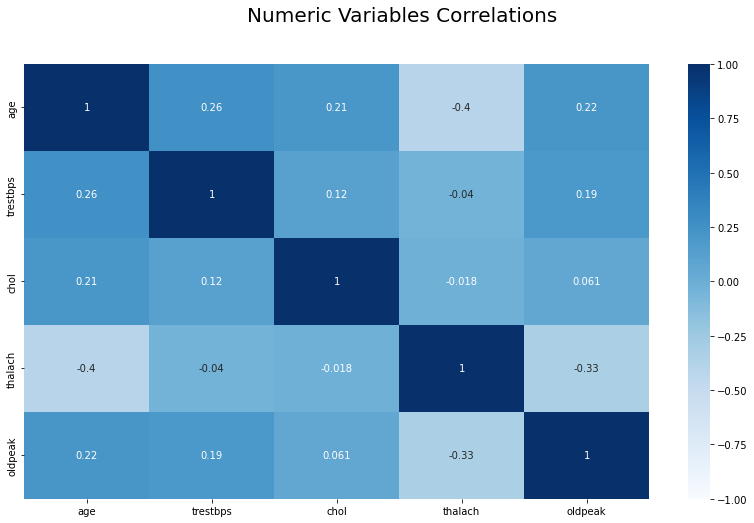

In [17]:
# print(f"Pearson Correlation:\n{df[numerical_features].corr()}")  # uncomment to see correlation matrix
# print(f"\nP-Value:\n{df[numerical_features].corr(method=lambda x, y: pearsonr(x, y)[1])}")  # uncomment to see p-value matrix

corr_matrix = df[numerical_features].corr()
corr_dict = {}
p_value_dict = {}
for x, y in corr_matrix.unstack().keys():
    if x != y:
        if not ((x,y) in corr_dict.keys() or (y,x) in corr_dict.keys()):
            corr_dict[(x,y)] = round(corr_matrix.unstack()[(x,y)], 3)
            p_value_dict[(x,y)] = round(df[numerical_features].corr(method=lambda x, y: pearsonr(x, y)[1]).unstack()[(x,y)], 5)

cor_pvalue_df = pd.concat((pd.DataFrame.from_dict(corr_dict, orient='index', columns=['pearson_correlation']), \
                            pd.DataFrame.from_dict(p_value_dict, orient='index', columns=['p_value'])), axis=1).sort_values(by='pearson_correlation', key=pd.Series.abs, ascending=False)

significant_df = cor_pvalue_df[cor_pvalue_df['p_value'] < 0.05]

fig, axes = plt.subplots(1,1, figsize=(14,8))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='Blues', ax=axes, vmin=-1, vmax=1)
fig.suptitle('Numeric Variables Correlations', fontsize=20)

print(f"\ncorrelation & p-value for numeric features:\n(sorted by correlation's absolut value)\n{'-'*50}\n{cor_pvalue_df}")
print(f"\nsignificant correlations:\n(sorted by correlation's absolut value)\n{'-'*50}\n{significant_df}")

For select pairs, with significant correlations, draw joint plot with marginal histograms (see Seaborn joint plot), find bivariate normal fits, and draw plots of the bivariate pdfs

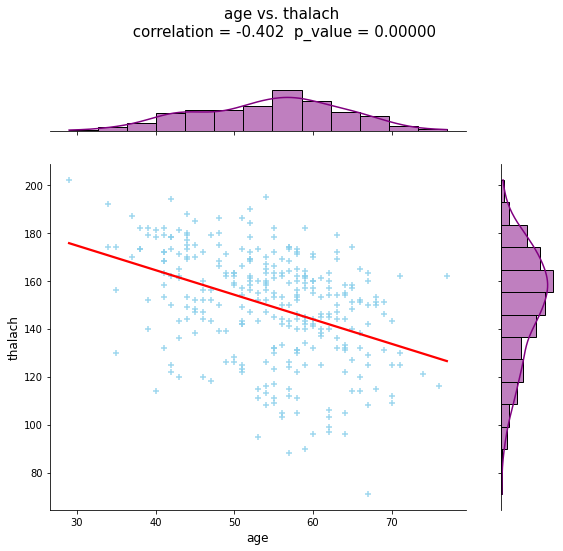

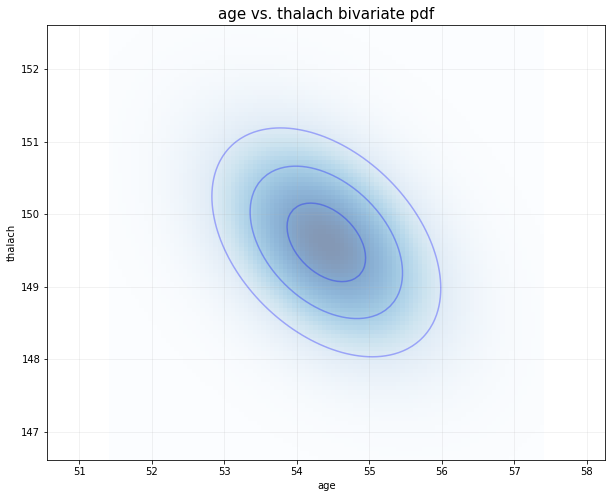

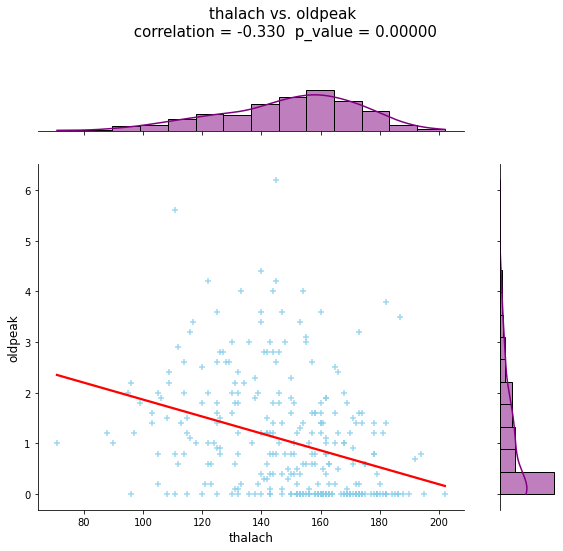

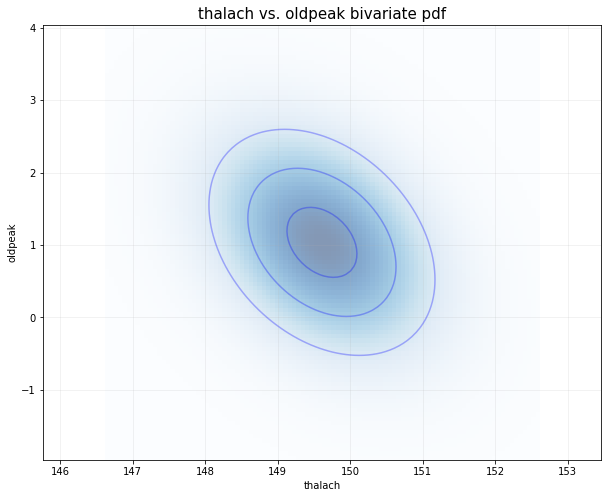

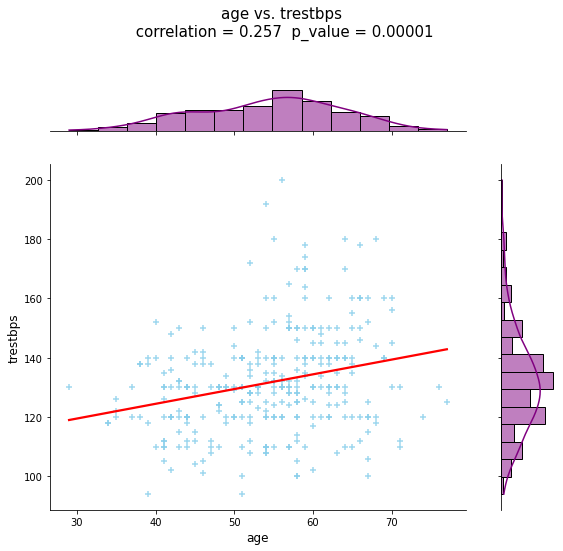

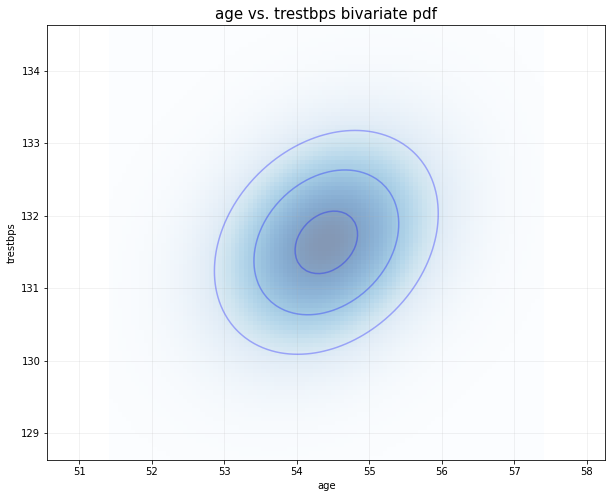

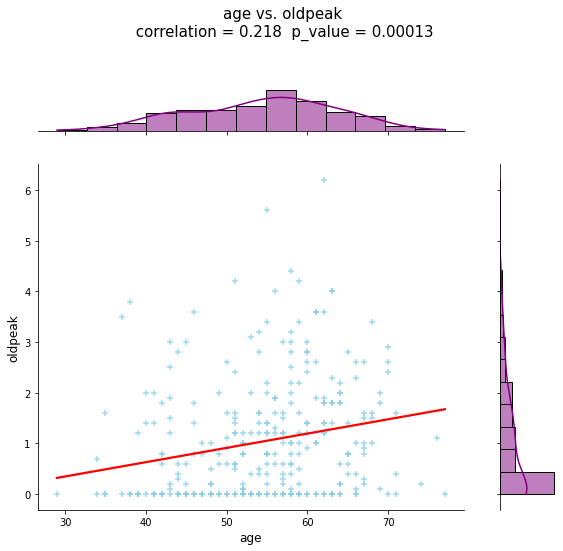

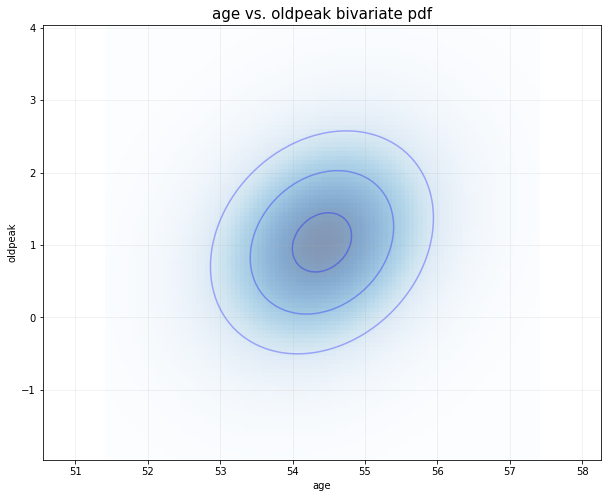

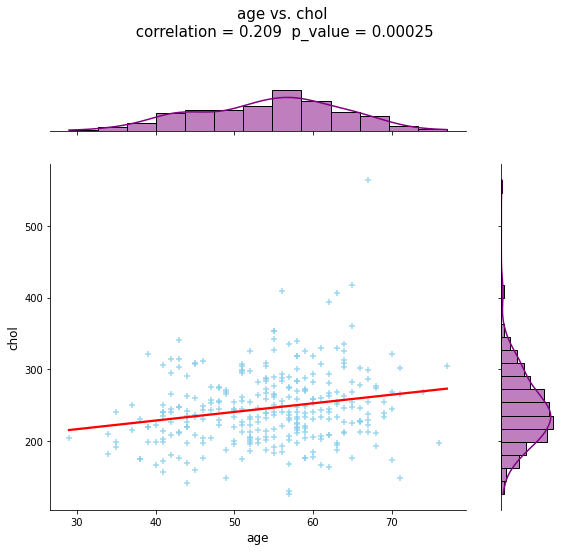

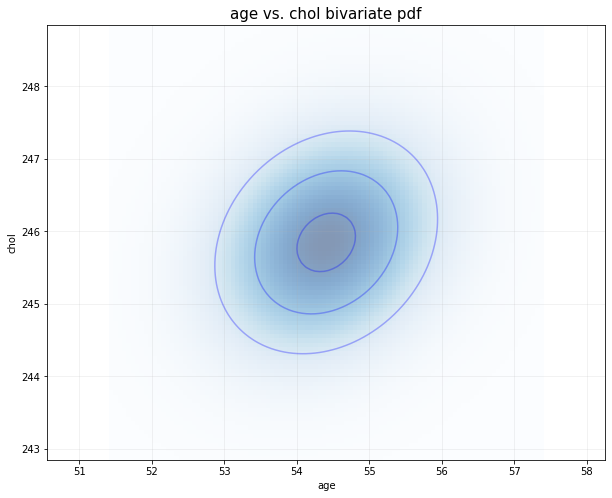

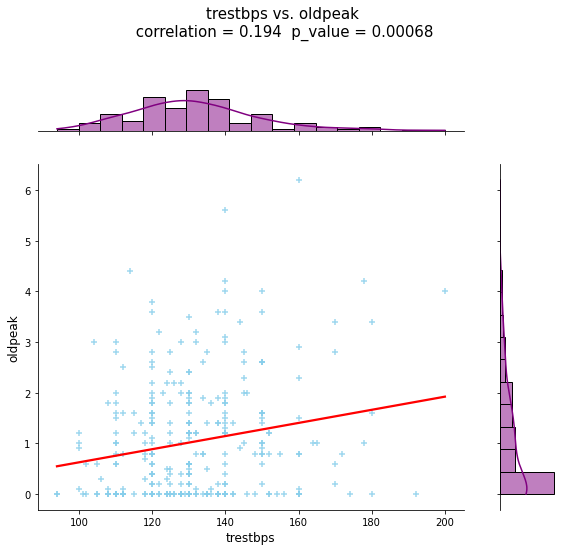

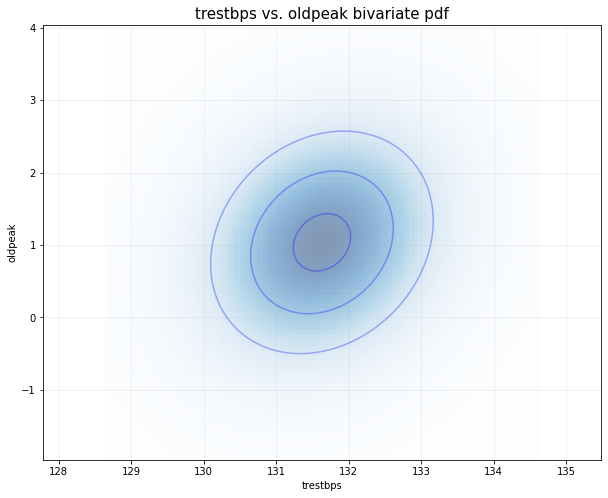

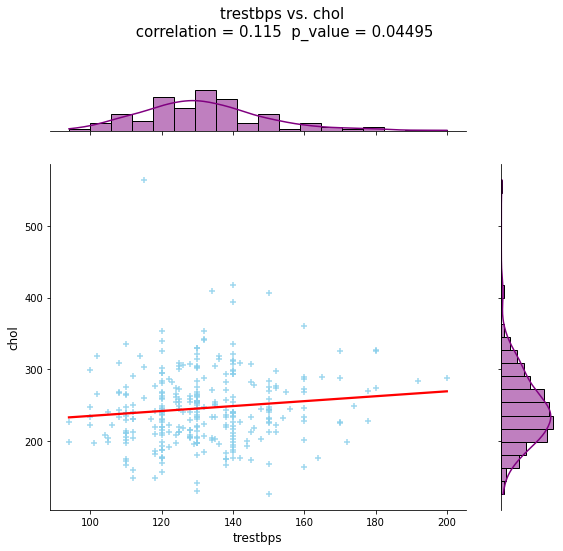

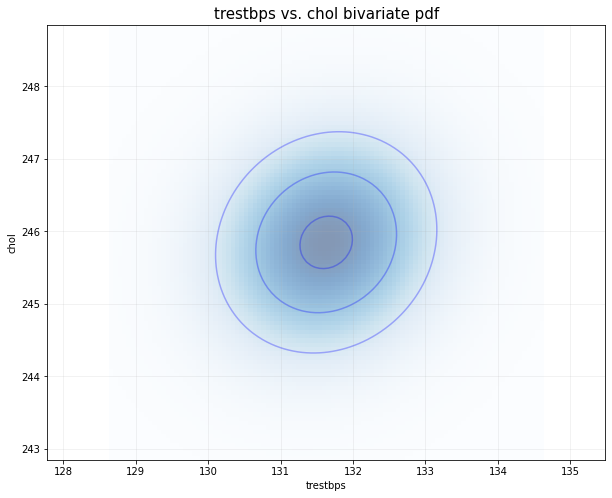

In [18]:
for idx, (x, y) in enumerate(significant_df.index):
    jp = sns.jointplot(df[x], df[y], marker='+', height=8, kind='reg',
                      joint_kws={'color':'skyblue', 'ci':None, 'line_kws':{'color':'red'}},
                      marginal_kws={'color':'purple'})
    jp.fig.suptitle(f"{x} vs. {y}\n correlation = {significant_df['pearson_correlation'][(x,y)]:.3f}  p_value = {significant_df['p_value'][(x,y)]:.5f}", fontsize=15)
    jp.fig.tight_layout(pad=3.0)
    jp.set_axis_labels(x, y, fontsize=12)
    jp.fig.set_size_inches(8.5, 8)
    plot_2d_Gaussian_pdf([df[x].mean(), df[y].mean()], df[[x, y]].corr().values.tolist(), [x,y])

Are there pairs that are significantly correlated in males but not in females? The opposite? How about healthy vs disease? Can you graphically represent this?

check the following pairs:
------------------------------
                    corr_diff
(trestbps, exang)       0.381
(trestbps, target)      0.355
(thalach, exang)        0.353
(oldpeak, ca)           0.328


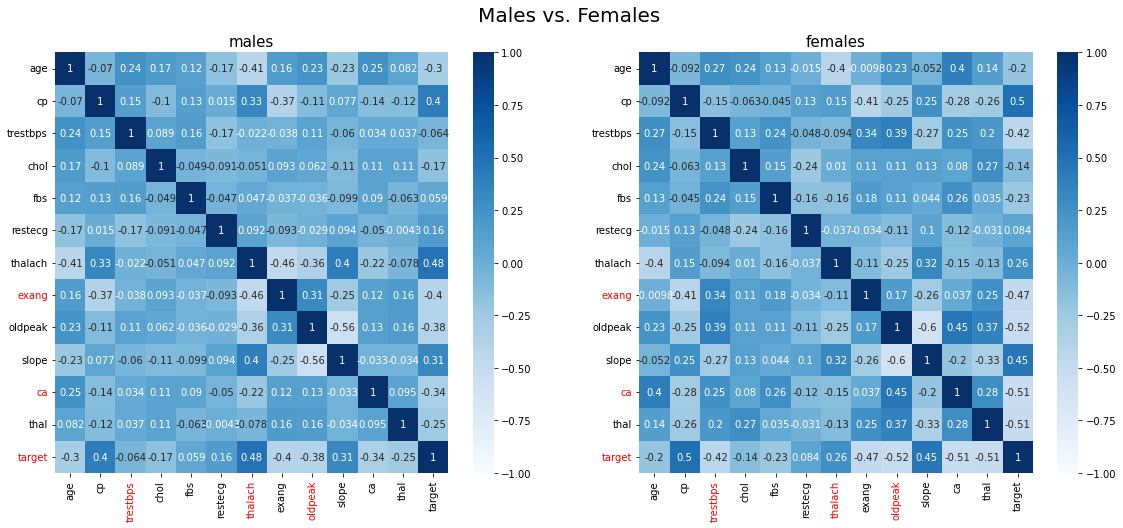

In [19]:
males = df[df['sex'] == 1]
females = df[df['sex'] == 0]

males_vs_females = abs(males.drop(columns=['sex']).corr() - females.drop(columns=['sex']).corr())

corr_dict = {}
for x, y in males_vs_females.unstack().keys():
    if x != y:
        if not ((x,y) in corr_dict.keys() or (y,x) in corr_dict.keys()):
            corr_dict[(x,y)] = round(males_vs_females.unstack()[(x,y)], 3)

males_vs_females = pd.DataFrame.from_dict(corr_dict, orient='index', columns=['corr_diff']).sort_values(by='corr_diff', ascending=False)
corr_diff_df = males_vs_females[males_vs_females['corr_diff'] >= 0.3]
features_list = corr_diff_df.index.to_list()

fig, axes = plt.subplots(1, 2, figsize=(17,8))
for idx, data in enumerate([males, females]):
    sns.heatmap(data.drop(columns=['sex']).corr(), annot=True, ax=axes[idx], cmap='Blues', vmin=-1, vmax=1)
    for tick_label_x in axes[idx].get_xticklabels():
        for tick_label_y in axes[idx].get_yticklabels():
            if (tick_label_x.get_text(), tick_label_y.get_text()) in features_list:
                tick_label_x.set_color('red')
                tick_label_y.set_color('red')
    axes[0].set_title("males", fontsize=15)
    axes[1].set_title("females", fontsize=15)
fig.suptitle('Males vs. Females', fontsize=20)
fig.tight_layout(pad=5.0)
fig.subplots_adjust(top=0.9)

print(f"check the following pairs:\n{'-'*30}\n{corr_diff_df}")


| pair        | Males           | Females  |
| ------------- |:-------------:| -----:|
| trestbps vs. exang      | -0.038 | 0.34 | 
| trestbps vs. target      | -0.064      |   -0.42 | 
| thalach vs. exang | -0.46      |    -0.11 |
| oldpeak vs. ca  | 0.13 | 0.45 |

<ins>insights:</ins>
* Among females, there is a positive correlation between exercise induced angina and resting blood pressure while among males these features are almost not correlated
* Among females, there is a negative correlation between having heart disease and the resting blood pressure, that is among females healthy patients have higher resting blood pressure in average. On the other hand, among males these features are almost not correlated.
* Among males, those who achived higher heart rate has less exercise induced angina in average.

check the following pairs:
------------------------------
                 corr_diff
(age, thalach)       0.393
(sex, trestbps)      0.335
(cp, exang)          0.300


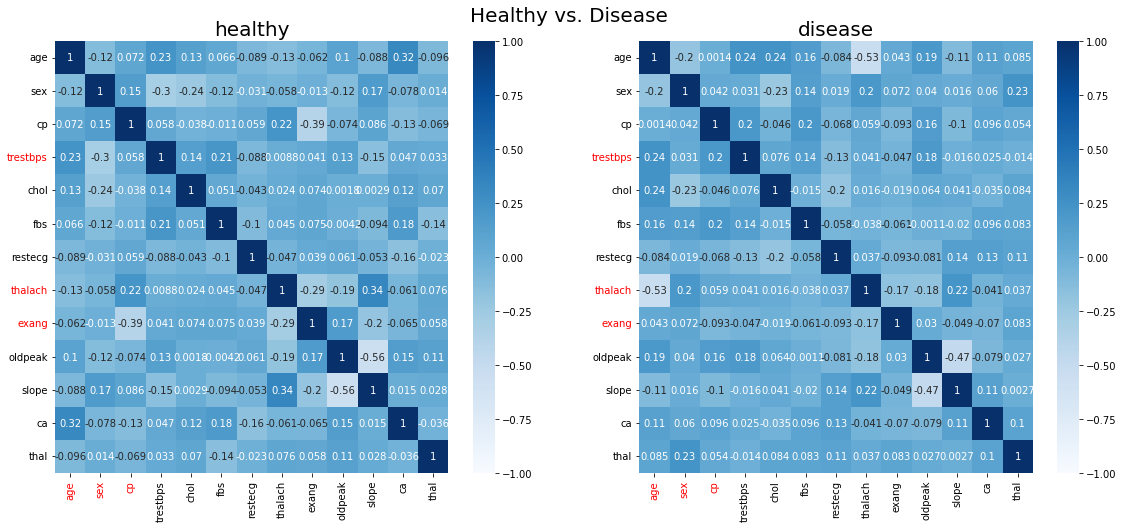

In [20]:
healthy = df[df['target'] == 0]
disease = df[df['target'] == 1]

healthy_vs_disease = abs(healthy.drop(columns=['target']).corr() - disease.drop(columns=['target']).corr())

corr_dict = {}
for x, y in healthy_vs_disease.unstack().keys():
    if x != y:
        if not ((x,y) in corr_dict.keys() or (y,x) in corr_dict.keys()):
            corr_dict[(x,y)] = round(healthy_vs_disease.unstack()[(x,y)], 3)

healthy_vs_disease = pd.DataFrame.from_dict(corr_dict, orient='index', columns=['corr_diff']).sort_values(by='corr_diff', ascending=False)
corr_diff_df = healthy_vs_disease[healthy_vs_disease['corr_diff'] >= 0.3]
features_list = corr_diff_df.index.to_list()


fig, axes = plt.subplots(1, 2, figsize=(17,8))
for idx, data in enumerate([healthy, disease]):
    sns.heatmap(data.drop(columns=['target']).corr(), annot=True, ax=axes[idx], cmap='Blues', vmin=-1, vmax=1)
    for tick_label_x in axes[idx].get_xticklabels():
        for tick_label_y in axes[idx].get_yticklabels():
            if (tick_label_x.get_text(), tick_label_y.get_text()) in features_list:
                tick_label_x.set_color('red')
                tick_label_y.set_color('red')
    axes[0].set_title("healthy", fontsize=20)
    axes[1].set_title("disease", fontsize=20)
fig.suptitle('Healthy vs. Disease', fontsize=20)
fig.tight_layout(pad=5.0)
fig.subplots_adjust(top=0.92)

print(f"check the following pairs:\n{'-'*30}\n{corr_diff_df}")

| pair        | Healthy           | Disease  |
| ------------- |:-------------:| -----:|
| age vs. thalach      | -0.13 | -0.53 | 
| sex vs. trestbps      | -0.3 |  0.031 | 
| cp vs. exang | -0.39      |    -0.093 |

<ins>insights:</ins>

* Among patients with heart disease, younger patients achieved higher maximal heart rate in average
* According to what we saw previously in the comparison between genders, we could see that there is a higher correlation of resting blood pressure among females than among males. It is important to note, that among the patients with heart disease there is almost no such correlation
* As could have been expected, exercise induced angina is less common among non-anginal pain, and asymptomatic patients among the healthy patients

For each numerical feature, except age, plot the distribution for this feature against bins of age. In each bin provide a split violin plot, with different colors for healthy and disease

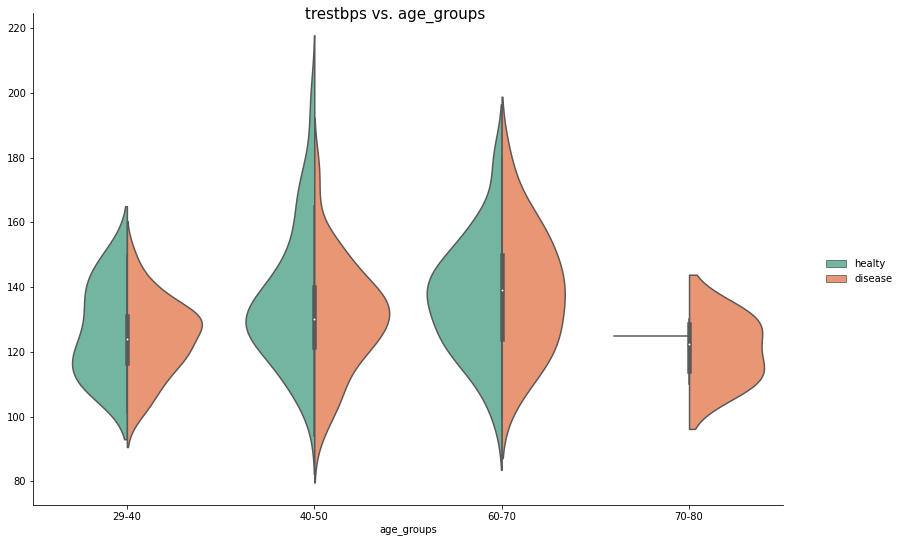

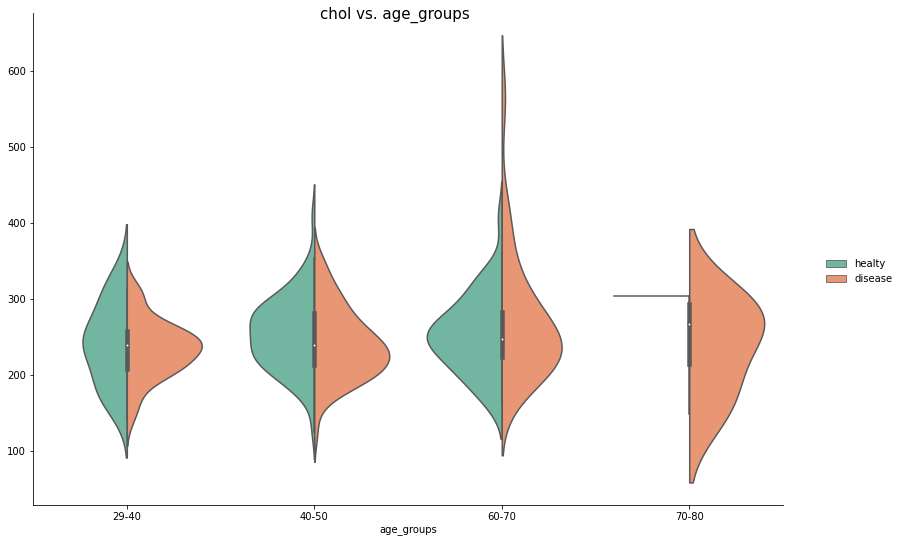

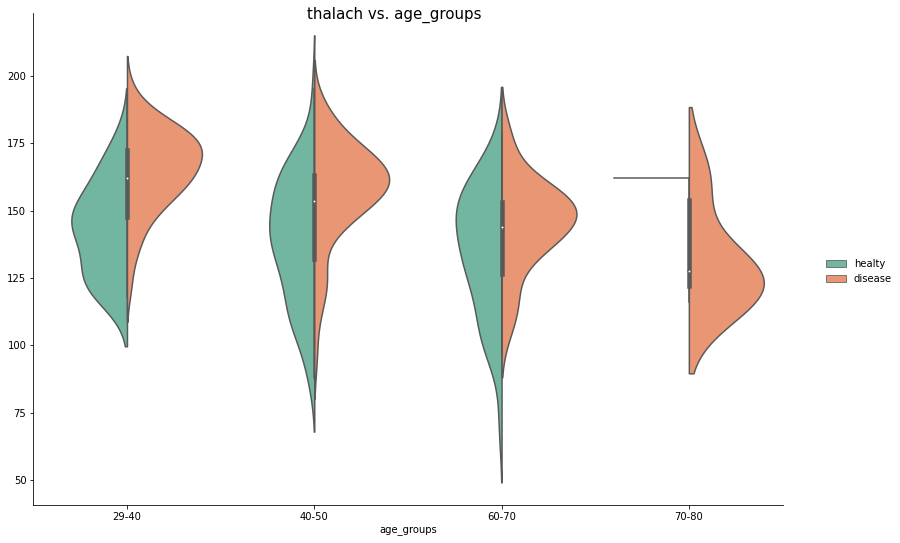

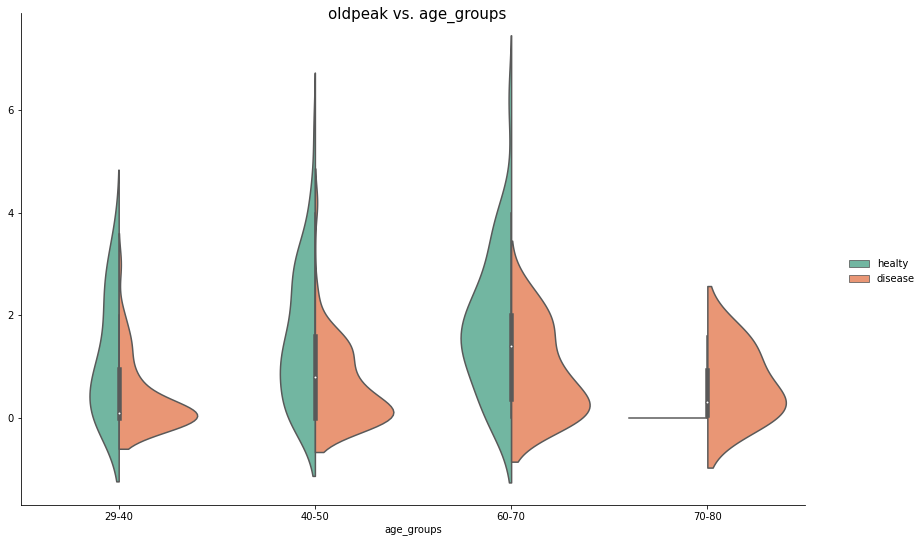

In [21]:
temp_df = df[numerical_features+['target']]
temp_df['age_groups'] = pd.cut(temp_df['age'], [40, 50, 60, 70, 80], labels=['29-40', '40-50', '60-70', '70-80'])
for feature in numerical_features:
    if feature != 'age':
        violin_plot = sns.catplot(x='age_groups', y=feature, data=temp_df, kind='violin', hue='target', split=True, palette="Set2")
        violin_plot.fig.suptitle(f"{feature} vs. age_groups", fontsize=15)
        violin_plot.fig.set_size_inches(14,8)
        violin_plot.set_ylabels('')
        violin_plot._legend.set_title('')
        legend_labels = ['healty', 'disease']
        for t, l in zip(violin_plot._legend.texts, legend_labels): t.set_text(l)
        

### Question 3 - Heavy Tailed Distributions and the Exponential Distribution (15 points)

### Heavy Tailed Distributions

Recall the definition of Heavy Tailed distribution from the lectures.

*A distribution is said to have a heavy right tail if its tail probabilities vanish slower than any exponential*
$$ \forall t>0, \lim_{x\to\infty} e^{tx}P(X>x)=\infty $$

Does the standard log-normal distribution have a heavy right tail? prove your answer.

Yes!

proof:

$$\lim_{x \to \infty}\frac{1-\int_{0}^{x} {\psi}(u) \,du}{e^{-tx}} \stackrel{L}{=} \lim_{x \to \infty}\frac{{\psi}(x)}{te^{-tx}} \stackrel{X \sim N(0,1)}{=} \lim_{x \to \infty}\frac{\frac{1}{x\sqrt{2\pi}}\cdot e^{-\frac{ln(x)^2}{2}}}{te^{-tx}} = \lim_{x \to \infty}{\frac{e^{(tx-\frac{ln(x)^{2}}{2})}}{tx\cdot\sqrt{2{\pi}}}} = \frac{"{\infty}"}{\infty} \underset{(i)}{\stackrel{L}{=}} \lim_{x \to \infty}\frac{(t-ln(x)\frac{1}{x})\cdot e^{(tx-\frac{lnx(x)^{2}}{2})}}{t\cdot\sqrt{2\pi}} \underset{(ii),(iii)}{=} \frac{"\infty"}{t\cdot \sqrt{2\pi}} = \infty $$ 

$(i) \lim_{x \to \infty}e^{(tx - \frac{ln(x)^{2}}{2})} = \lim_{x \to \infty}e^{x(t-\frac{ln(x)^{2}}{2x})} \underset{(ii)}{=} "e^{\infty(t-0)}" = "e^{\infty}" = \infty$

$(ii) \lim_{x \to \infty}\frac{ln(x)^2}{x} \stackrel{L}{=} \lim_{x \to \infty}2\cdot\frac{\frac{1}{x}\cdot ln(x)}{1} = 2\cdot\lim_{x \to \infty}\frac{ln(x)}{x} = 0$

$(iii) \lim_{x \to \infty}(t-ln(x)\cdot\frac{1}{x}) = \lim_{x \to \infty}t - \lim_{x \to \infty}\frac{ln(x)}{x} = t-0$

### Special Properties of the Exponential Distribution

Let $X_1 \sim exp(\lambda_1)$ and $X_2 \sim exp(\lambda_2)$ be two independent exponential random variables.

Calculate $P(X_1 < X_2)$.

$$ P(X_1 < X_2) = \int_{0}^{\infty}{P(X_1 < X_2 | X_1 = x)\cdot\lambda_1\cdot e^{-\lambda_1\cdot x}\,dx} = \int_{0}^{\infty}{P(X_1 < X_2)\cdot\lambda_1\cdot e^{-\lambda_1\cdot x}\,dx} = \int_{0}^{\infty}{\lambda_1\cdot e^{-\lambda_1\cdot x}\cdot e^{-\lambda_2\cdot x}}\, dx = \lambda_1\int_{0}^{\infty}e^{-(\lambda_1+\lambda_2)x}\,dx = \newline\lambda_1\cdot\frac{1}{\lambda_1+\lambda_2} = \frac{\lambda_1}{\lambda_1+\lambda_2}$$

### Question 4 - CLT for Markov chains (15 points)

In this exercise you will construct trajectories of Markovian dice rolling results in the following way.<br>
The first roll, X0, is Unif(1..6)<br>
After i rolls are determined the i+1st, Xi+1, is drawn according to the row that corresponds to the value of Xi in the matrix T below. <br>
In other words, T is the transition matrix of a Markov chain and the initial distribution is uniform.

\begin{equation*}
T = 
\begin{pmatrix}
0.4 & 0.2 & 0.1 & 0 & 0.1 & 0.2 \\
0.2 & 0.4 & 0.2 & 0.1 & 0 & 0.1 \\
0.1 & 0.2 & 0.4 & 0.2 & 0.1 & 0 \\
0 & 0.1 & 0.2 & 0.4 & 0.2 & 0.1 \\
0.1 & 0 & 0.1 & 0.2 & 0.4 & 0.2 \\
0.2 & 0.1 & 0 & 0.1 & 0.2 & 0.4
\\\end{pmatrix}
\end{equation*}

In [48]:
T = np.array(
            [[0.4, 0.2, 0.1, 0, 0.1, 0.2],
            [0.2, 0.4, 0.2, 0.1, 0, 0.1],
            [0.1, 0.2, 0.4, 0.2, 0.1, 0],
            [0, 0.1, 0.2, 0.4, 0.2, 0.1],
            [0.1, 0, 0.1, 0.2, 0.4, 0.2],
            [0.2, 0.1, 0, 0.1, 0.2, 0.4]])

def trajectories(traj_num: int, length: int):
    res = np.zeros((traj_num,length))
    x0 = np.ones(6)*1/6
    for traj in range(traj_num):
        prob = x0
        for i in range(length):
            dice_res = np.random.choice([1, 2, 3, 4, 5, 6], p=prob)
            prob = T[dice_res - 1]
            res[traj, i] = dice_res
    return res

#### 4.A
Construct 1000 trajectories, each of length 30.
1. What do you expect the average value of all 30 numbers in a trajectory to be?
2. Compute the average value of each such trajectory. Draw a histogram of the 1000 numbers you received, using 20 bins.
3. What does the distribution look like? What are the empirical mean and the std?

After 30 experiments, the trajectory will converge to the stationary distribution $\pi$ , and the average will be found by multiplying this distribution with the possible values, thus we expect the average value of the 30 numbers will be 3.5, explanation:

Let E = {$e_1,...,e_n$} $\rightarrow$ in our case E = {1, 2, 3, 4, 5, 6}<br><br>
Let $ X_0 \sim U(1,..,6) $ So it can be described by a row vector $q_0$ of size N, and Let T be a matrix of size N x N, Such that $q_0(e_i) = P(X_0 = e_i)$, and $P(e_i, e_j) = P(X_{n+1} = e_j | X_n = e_i)$ (independent of n).<br><br>Therefore, by denoting the probability distribution at step n by a raw vector $q_n(e_i) = P(X_n = e_i) $ the following equation holds:<br>$$q_{2}=q_{1}P \rightarrow q_{1} = q_0P \Rightarrow q_{2} = q_0P^{2} \newline Then \Rightarrow q_{n} = q_0P^{n} $$ so we get a row vector of size N that determines the probabilty $ \Rightarrow $ in our case [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]

In [23]:
np.linalg.matrix_power(T, 30).dot(np.ones(6)*1/6)

array([0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
       0.16666667])


In order to find the average value of the trajectory we need to multiply the stationary distribution with the possible values

In [24]:
np.linalg.matrix_power(T, 30).dot(np.ones(6)*1/6).dot(np.arange(1,7))

3.5000000000000133

Therefore, we got that the expected average value of all 30 numbers in a trajectory is 3.5


-------------
mean is 3.50
std is 0.49
-------------

The distribution looks like a normal distribution


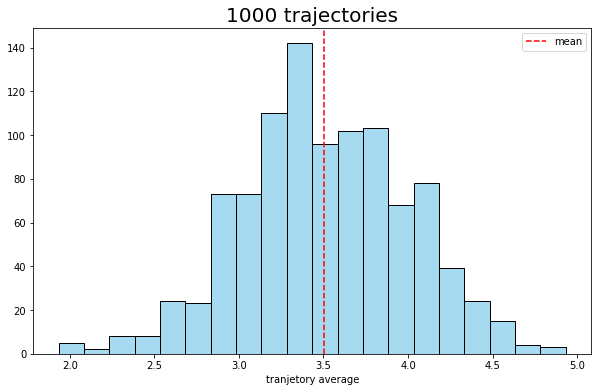

In [25]:
result_matrix = trajectories(traj_num=1000, length=30)
average_res = result_matrix.mean(axis=1)

plt.figure(figsize=(10, 6))
sns.histplot(average_res, bins=20, color='skyblue')
plt.title('1000 trajectories', fontdict=dict(fontsize=20))
plt.xlabel('tranjetory average', fontdict=dict(fontsize=10))
plt.ylabel('')
plt.axvline(x=average_res.mean(), linestyle='--', color='r', label=f'mean')
plt.legend()
print(f"\n{'-'*13}\nmean is {average_res.mean():.2f}\nstd is {average_res.std():.2f}\n{'-'*13}")
print('\nThe distribution looks like a normal distribution')

##### 4.B
Construct 1000 trajectories, each of length 500.
1. What do you expect the average value of all 500 numbers in a trajectory to be?
2. Compute the average value of each such trajectory. Draw a histogram of the 1000 numbers you received, using 20 bins.
3. What does the distribution look like? What are the empirical mean and the std?

Now we expect the value to be 3.5 same as in section 4.A, since from a large number (~17) the distribution matrix (T) converges and doesn't change, so the value of $T^{30}$ and $T^{500}$ remains the same.

Moreover, $q_0$ (from the explanation in 4.A.1.) remains the same $\rightarrow$ then the average value should remain 3.5


-------------
mean is 3.50
std is 0.12
-------------

The distribution looks like a normal distribution


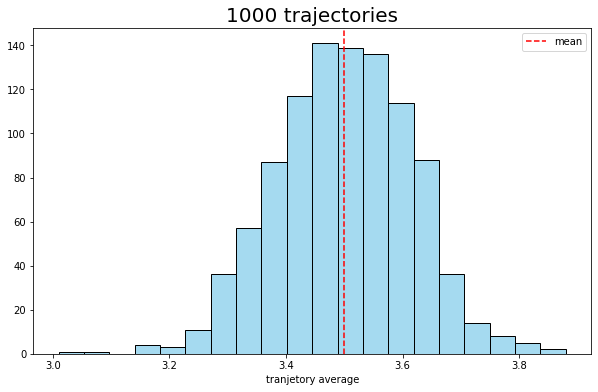

In [26]:
result_matrix = trajectories(traj_num=1000, length=500)
average_res = result_matrix.mean(axis=1)

plt.figure(figsize=(10, 6))
sns.histplot(average_res, bins=20, color='skyblue')
plt.title('1000 trajectories', fontdict=dict(fontsize=20))
plt.xlabel('tranjetory average', fontdict=dict(fontsize=10))
plt.ylabel('')
plt.axvline(x=average_res.mean(), linestyle='--', color='r', label=f'mean')
plt.legend()
print(f"\n{'-'*13}\nmean is {average_res.mean():.2f}\nstd is {average_res.std():.2f}\n{'-'*13}")
print('\nThe distribution looks like a normal distribution')

#### 4.C
Draw normal fit curves on your two histograms.

In [27]:
result_matrix_30 = trajectories(traj_num=1000, length=30)
average_res_30 = result_matrix_30.mean(axis=1)

result_matrix_500 = trajectories(traj_num=1000, length=500)
average_res_500 = result_matrix_500.mean(axis=1)

Text(0, 0.5, '')

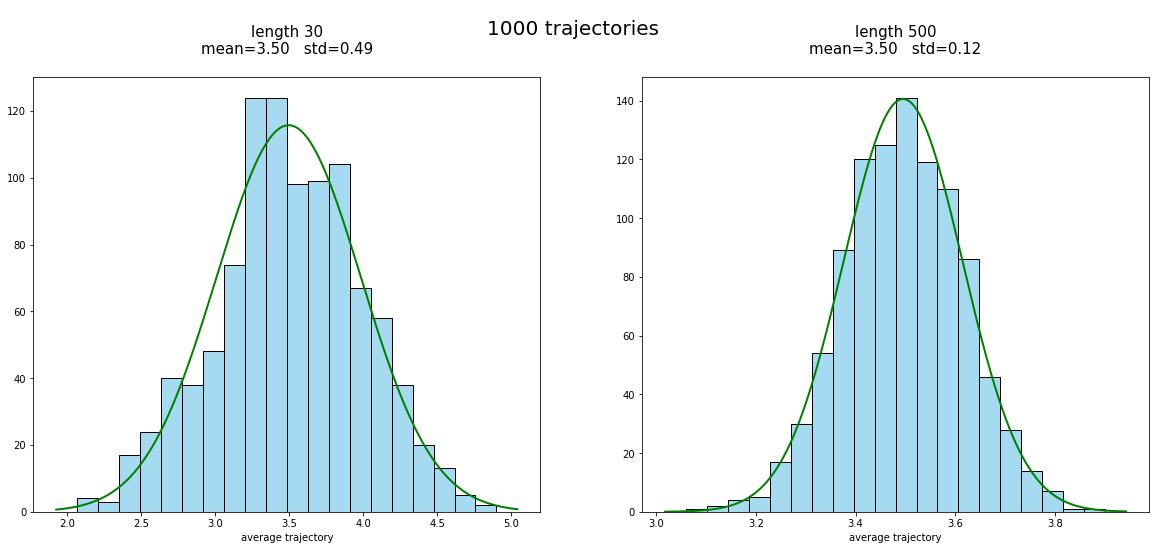

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
fig.suptitle('1000 trajectories', fontsize=20)

sns.histplot(average_res_30, bins=20, ax=axes[0], color='skyblue')
line_30 = np.linspace(*axes[0].get_xlim(), 1000)
dist_30 = norm.pdf(line_30, average_res_30.mean(), average_res_30.std())
axes[0].plot(line_30, dist_30*1000*((average_res_30.max()-average_res_30.min())/20), 'g', linewidth=2)
axes[0].set_title(f'\nlength 30\nmean={average_res_30.mean():.2f}   std={average_res_30.std():.2f}\n', fontsize=15)
axes[0].set_xlabel('average trajectory', fontsize=10)
axes[0].set_ylabel('')


sns.histplot(average_res_500, bins=20, ax=axes[1], color='skyblue')
line_500 = np.linspace(*axes[1].get_xlim(), 1000)
dist_500 = norm.pdf(line_500, average_res_500.mean(), average_res_500.std())
axes[1].plot(line_500, dist_500*1000*((average_res_500.max()-average_res_500.min())/20), 'g', linewidth=2)
axes[1].set_title(f'\nlength 500\nmean={average_res_500.mean():.2f}   std={average_res_500.std():.2f}\n', fontsize=15)
axes[1].set_xlabel('average trajectory', fontsize=10)
axes[1].set_ylabel('')

#### 4.D
Write a python code to calculate $Cov(X_0,X_i)$ for $i=1,..,500$ based on $\pi_0$ and $T$. 

Compute the values for our case.

In [50]:
def cov_calc(prob_mat, n, E_x0, E_xi):
    covariances = []
    for i in range(1, n+1):
        E_x0xi = 0
        t = np.linalg.matrix_power(prob_mat, i)
        for k in range(1, prob_mat.shape[1]+1):
            for j in range(1, prob_mat.shape[1]+1):
                E_x0xi += t[k-1][j-1]*k*j
        E_x0xi /= t.sum()
        covariances.append(E_x0xi-(E_x0*E_xi))
    return covariances

# cov_calc(T, 500, 3.5, 3.5)  # uncomment to see the values

#### 4.E - Bonus (5 Points)
Let $\bar{X_n}$ be the sample average for a single trajectory of length $n$.
1. Show that **in our case**:
$$E(\bar{X_n}) =E(X_0)$$
What is it in our case ($\pi_0$ and $T$ as defined above)?
2. Show that 
$$Var(\bar{X_n}) = \frac{1}{n}\sigma_0^2 + \frac{2}{n^2}\sum_{d=1}^{n-1}(n-d)Cov(X_0, X_d)$$
Calculate it for our case.
3. Formulate the CLT for Markov Chains.
4. Graphically show that the CLT holds for n=500 in our case.

### Question 5 - Distributions (15 Points)

Let $X$ be a random variable with a median value $Med(X) = m$. Recall that this means that $P(X\le m)=0.5$.

Consider a sample $\vec{x}(n) = x_1,...,x_n$ sampled independently from $X$. Without loss generality, assume that the observations are sorted. That is, $x_1 \le x_2 \le ... \le x_n$. Also assume that $n$ is odd and $n > 100$.

Let $R(\vec{x}(n))$ be the largest index $i \in {1,...,n}$ such that $x_i \le m$.

1. What is the distribution of $R$?
1. Given $n$, compute a function $\lambda (n)$ so that $P(x_{\lambda (n)} \le m) \ge 0.95)$ and $P(x_{\lambda (n)+1} \le m) < 0.95)$.

$R(\vec{x}(n)) \sim Binom(n, 0.5)$ 

$\vec{x}(n) = x_1,...,x_n$ sampled independently from $X$ so every entry in $\vec{x}(n)$ has a probability of 0.5 to be located at the left hand side.

For example 'k' successes means k entries that are smaller or equal to m, and n-k entries that are bigger than m.<br>Since $\vec{x}(n)$ is sorted by $x_1 \le x_2 \le ... \le x_n$ , $x_k$ is the largest number that is smaller or equal to m $\Rightarrow x_1 \le x_2 \le ... \le x_k \le m \quad \forall k \in {0,1,...,n}$

Moreover, by definition in case that k = 0, that is 0 enries are smaller or equal to m (0 sucesses) $R(\vec{x}(n)) = 0$


Therefor $P(R(\vec{x}(n) = k)) = {n \choose k}\cdot p^{k} \cdot p^{n-k} = \frac{{n \choose k}}{2^{n}} \quad \forall \quad R(\vec{x}(n)) \in [0,n]$<br><br>$\mathrm{E}[R(\vec{x}(n))] = n\cdot p = \frac{n}{2} \quad\quad \mathrm{Var}[R(\vec{x}(n))] = n\cdot p\cdot 1-p = \frac{n}{4}$

Since $\vec{x}(n) = x_1,...,x_n$ sampled independently from $X$ and $100 < n$ we could use the Central Limit Theorem $ \quad \forall \quad z = 0.05\quad \Phi(z) = -1.64$

$P(\frac{\frac{R(\vec{x}(n))}{n} - \mu}{\frac{\sigma}{\sqrt{n}}} < z) = P(\frac{\frac{R(\vec{x}(n))}{n} - \frac{1}{2}}{\frac{1}{2\sqrt{n}}} < z) = P(\frac{R(\vec{x}(n)))}{n} < \frac{z}{2\sqrt{n}} + \frac{1}{2}) \Rightarrow P(R(\vec{x}(n))) < \frac{n}{2} + \frac{\sqrt{n}}{2}z) = \Phi(z) \Rightarrow P(R(\vec{x}(n))) < \lfloor\frac{n}{2} - \frac{\sqrt{n}}{2}1.64\rfloor)$

In [21]:
def lambda_func(n: int):
    return int(np.floor((n/2)-(np.sqrt(n)/2)*1.644854))

# lambda_func(100)